<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the upcoming book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler (expected Aug 2017).
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [Representing Text Features](04.04-Represening-Text-Features.ipynb) | [Contents](../README.md) | [Using Decision Trees to Make a Medical Diagnosis](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) >

# Representing images

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_bgr = cv2.imread('data/lena.jpg')

## Using Color Spaces

### RGB

By default, OpenCV reads color images as BGR. We can convert that to RGB:

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

Then we can use Matplotlib to plot the images (BGR on the left, RGB on the right):

NameError: name 'img_rgb' is not defined

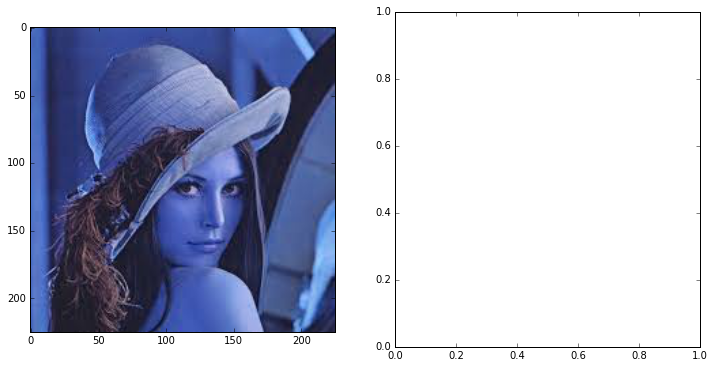

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_bgr)
plt.subplot(122)
plt.imshow(img_rgb)

### HSV

HSV is a more perceptually aligned color representation, by using *hue*, *saturation*, and *value*:

In [ ]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

## Detecting corners

One of the most straightforward features to find in an image are *corners*.

Harris corner detection works on grayscale images:

In [ ]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

We specify the pixel neighborhood size considered for corner detection (`blockSize`), an aperture parameter for the edge detection (`ksize`), and the so-called Harris detector-free parameter (`k`):

In [ ]:
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)

Let's have a look at the result:

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(corners, cmap='gray')

## Using the Scale-Invariant Feature Transform (SIFT)

However, corner detection is not sufficient when the scale of an image changes. To this end, David Lowe
came up with a method to describe interesting points in image independently of orientation and size - hence
the name scale-invariant feature transform (SIFT). In OpenCV 3, this function is part of the
`xfeatures2d` module:

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

The algorithm works in two steps:

- *detect* features:  This step identifies interesting points in an image (also known as keypoints)
- *compute* features:  This step computes the actual feature values for every keypoint.

Keypoints can be detected with a single line of code:

In [ ]:
kp = sift.detect(img_bgr)

We can use the `drawKeypoints` function to visualize identified keypoints.
We can also pass
an optional flag `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` to surround every keypoint
with a circle whose size denotes its importance, and a radial line that indicates the orientation of the
keypoint:

In [ ]:
import numpy as np
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(img_kp)

Feature descriptors can be computed with `compute`:

In [ ]:
kp, des = sift.compute(img_bgr, kp)

Typically you get 128 feature values for every keypoint found:

In [ ]:
des.shape

You can do these two steps in one go, too:

In [ ]:
kp2, des2 = sift.detectAndCompute(img_bgr, None)

And the result should be the same:

In [ ]:
np.allclose(des, des2)

## Using Speeded Up Robust Features (SURF)

SIFT has proved to be really good, but it is not fast enough for most applications. This is where speeed up
robust features (SURF) come in, which replaced the computationally expensive computations of SIFT with a
box filter. In OpenCV, SURF works in the exact same way as SIFT:

In [ ]:
surf = cv2.xfeatures2d.SURF_create()

In [ ]:
kp = surf.detect(img_bgr)

In [ ]:
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(img_kp)

In [ ]:
kp, des = surf.compute(img_bgr, kp)

SURF finds more keypoints, and usually returns 64 feature values per keypoint:

In [ ]:
des.shape

<!--NAVIGATION-->
< [Representing Text Features](04.04-Represening-Text-Features.ipynb) | [Contents](../README.md) | [Using Decision Trees to Make a Medical Diagnosis](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) >